## Problem 1: Plot classical Frequentist curve for beta = 0.05

Asks us to create a Frequentist class that can produce equation 1

$\beta = \sum \frac{(n_b + n_s)^n}{n!}e^{-((n_b+n_s)}$

Sum has limits n = 0 to $n_{obs}$

In [32]:
import numpy as np
import scipy
import scipy.stats
import math
import matplotlib.pyplot as plt

Part 1a)

In [27]:
# Create frequentist class

class Frequentist:
    
    # Calculates beta
    def beta(n_obs, mean):
        
        total = 0
        
        # across range 0 to n_obs+1 (inclusive)
        for i in range(n_obs+1):
            # add up poissonian probability across n_obs
            total += scipy.stats.poisson.pmf(i, mean)
            #print(total)
            #print("BREAK")
            
        return total
            
            

Part 1b)

Write a loop over n_b, n_s^upper and n_obs that scans these variables from zero up to a maximum value with a step of 0.1.

For each (n_s^upper, n_b) pair, calculate the probability $\beta$. When $\beta$ is 'very close' to the target 5%, store the pair into an array. Set n_b max as 15 and n_s^upper max as 15

In [54]:
# Start loop, with n_obs = 6, and we're doing 6+1

def n_obs_beta(n_obs):
    # Create pair list
    pair_list = []
    # Create n_b and n_s^upper arrays
    n_b = np.linspace(0, 15, 151, endpoint=True)
    n_supper = np.linspace(0, 15, 151, endpoint=True)
    #print(n_b)

    # Scan over n_s^upper and n_b and calculate the probabilities of beta for each, if beta is very close to 5%, store pair into array.
    for i in range(len(n_b)):
        for j in range(len(n_supper)):
            mean = n_b[i] + n_supper[j]
            prob = Frequentist.beta(n_obs, mean)

            # check if beta is close to 5%, if so, add to list. (Tolerance?)
            #print(prob)
            if (math.isclose(0.05, prob, rel_tol = 0.05)):
                pair_list.append([n_b[i], n_supper[j]])
                #print(prob)

    return pair_list
    
    

In [69]:
# Take lists of ns nb for 0 through to 6
n_obs_pair_list = []
for i in range(0,7):
    # Append each obs pair list to larger list
    n_obs_pair_list.append(n_obs_beta(i))
    

<Figure size 720x720 with 0 Axes>

Part 1c) plotting

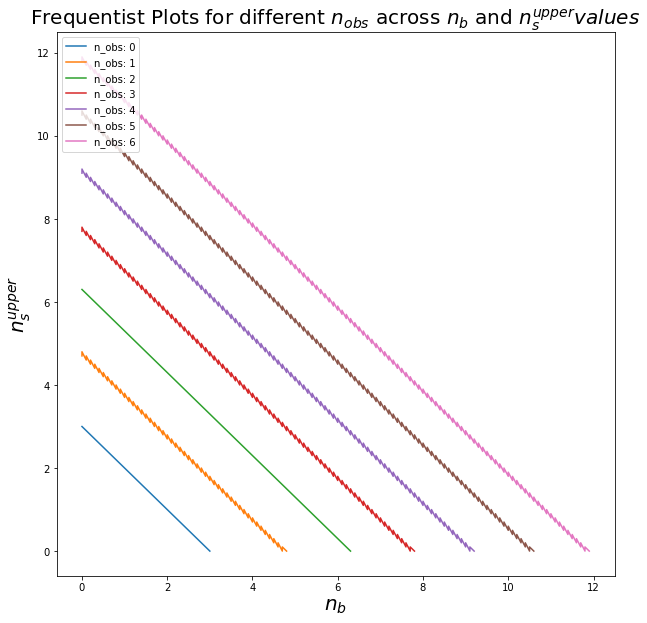

In [75]:
# Plotting to stop rerun
plt.figure(figsize=(10,10))
for i in range(0, 7):
    # plot each n_obs list
    plt.plot(np.asarray(n_obs_pair_list[i])[:,0], np.asarray(n_obs_pair_list[i])[:,1], label = "n_obs: " + str(i))
    
# set details and show
plt.title(r"Frequentist Plots for different $n_{obs}$ across $n_b$ and $n_s^{upper} values$", fontsize = 20)
plt.xlabel("$n_b$", fontsize = 20)
plt.ylabel("$n_s^{upper}$", fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

# Problem 2: The Bayesian method

Do the same for Bayesian class. Instead beta needs to include n_s and n_b, with equation 4 implementation

In [71]:
# Create Bayesian class

class Bayesian:
    
    # Calculates beta
    def beta(n_obs, n_s, n_b):
        
        total = 0
        comp1 = 0
        comp2 = 0
        
        # give exponent as its not part of the sum
        exponent = np.exp(-n_s)
        
        # Collect the sum components.
        for i in range(n_obs+1):
            # Sum up the components
            comp1 += ((n_b + n_s)**i)/(math.factorial(i))
            comp2 += (n_b)**i/(math.factorial(i))
        
        total = exponent*(comp1/comp2)
            
            
        return total

In [72]:
# Create the same looping function
def n_obs_beta_bay(n_obs):
    # Create pair list
    pair_list = []
    # Create n_b and n_s^upper arrays
    n_b = np.linspace(0, 15, 151, endpoint=True)
    n_supper = np.linspace(0, 15, 151, endpoint=True)
    #print(n_b)

    # Scan over n_s^upper and n_b and calculate the probabilities of beta for each, if beta is very close to 5%, store pair into array.
    for i in range(len(n_b)):
        for j in range(len(n_supper)):
            mean = n_b[i] + n_supper[j]
            prob = Bayesian.beta(n_obs, n_supper[j], n_b[i])

            # check if beta is close to 5%, if so, add to list. (Tolerance?)
            #print(prob)
            if (math.isclose(0.05, prob, rel_tol = 0.05)):
                pair_list.append([n_b[i], n_supper[j]])
                #print(prob)

    return pair_list
    

In [73]:
# Take lists of ns nb for 0 through to 6
n_obs_pair_list_bay = []
for i in range(0,7):
    # Append each obs pair list to larger list
    n_obs_pair_list_bay.append(n_obs_beta_bay(i))

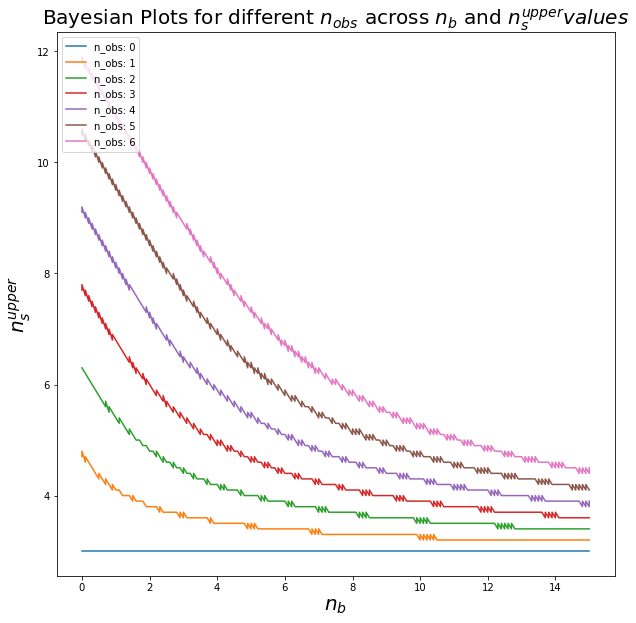

In [76]:
# Plotting to stop rerun
plt.figure(figsize=(10,10))
for i in range(0, 7):
    # plot each n_obs list
    plt.plot(np.asarray(n_obs_pair_list_bay[i])[:,0], np.asarray(n_obs_pair_list_bay[i])[:,1], label = "n_obs: " + str(i))
    
# set details and show
plt.title(r"Bayesian Plots for different $n_{obs}$ across $n_b$ and $n_s^{upper} values$", fontsize = 20)
plt.xlabel("$n_b$", fontsize = 20)
plt.ylabel("$n_s^{upper}$", fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

Its clear from this plot that the Bayesian upper limits are more conservative, as it requires much lower background, even for higher signal, to ensure a $\beta$ of 5% when compared to the frequentist method.

# Problem 3: The CLs method

3a) Plot the expected $<n_s>$ and $<n_b>$ vs Mx in the appropriate mass range.

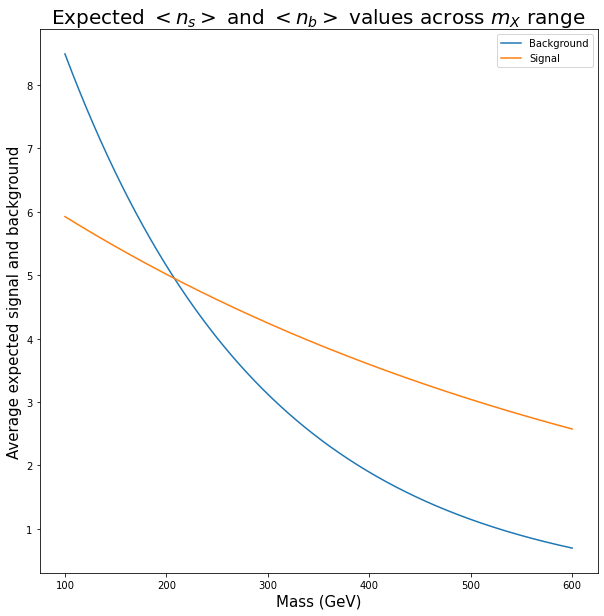

In [84]:
# Plot masses

S = 7
B = 14
lamb = 1/(200) # GeV/c^2
lams = 1/(600) # GeV/c^2

# set mass range within 100-600 GeV region
mass = np.linspace(100, 600, 1000)

# Collect list of values for expected mass values.
nb = B * np.exp(-lamb*mass)
ns = S * np.exp(-lams*mass)


# Plot
plt.figure(figsize=(10,10))
plt.plot(mass, nb, label = "Background")
plt.plot(mass, ns, label = "Signal")
plt.legend(loc = "upper right")
plt.xlabel("Mass (GeV)", fontsize = 15)
plt.ylabel("Average expected signal and background", fontsize = 15)
plt.title(r"Expected $<n_s>$ and $<n_b>$ values across $m_X$ range", fontsize = 20)


plt.show()

So we can clearly see here that our signal process is the dominant process after 200 GeV, but now before this.

Part 3b) Pseudo-experiments H1 and H0.

Create 2000 pseudo-experiments for H1 model with given mass. Will do this in a class

In [135]:
# Create H1 model class
class pseudoexp():
    def __init__(self):
        self.lamb = 1/(200) # GeV/c^2
        self.lams = 1/(600) # GeV/c^2
        self.B = 14
        self.S = 7
        
    def generate(self, mass):
        # For mass value, return <n> = <nb>*mx + <ns>*mx
        # This is the H1 model
        nb = self.B * np.exp(-self.lamb*mass)
        ns = self.S * np.exp(-self.lams*mass)
        
        return nb, ns
        
    def likelihoods_H1(self, mass):
        # Cllect random poisson probability for number of events
        nb, ns = self.generate(mass)
        ran = np.random.poisson(ns+nb)
        
        # Likelihood calculations
        L1 = scipy.stats.poisson.pmf(ran, nb+ns)
        L0 = scipy.stats.poisson.pmf(ran, nb)
        
        return L1, L0
    
    def likelihoods_H0(self, mass):
        # Cllect random poisson probability for number of events
        nb, ns = self.generate(mass)
        ran = np.random.poisson(nb)
        
        # Likelihood calculations
        L1 = scipy.stats.poisson.pmf(ran, nb+ns)
        L0 = scipy.stats.poisson.pmf(ran, nb)
        
        return L1, L0
    
    def test_stats(self, mass):
        # collect L1 and L0
        L1_1, L0_1 = self.likelihoods_H1(mass)
        L1_0, L0_0 = self.likelihoods_H0(mass)
        # Calculate test statistic
        t_0 = -2*np.log(L1_1/L0_1)
        t_1 = -2*np.log(L1_0/L0_0)
        return t_0, t_1
        
        
        

In [138]:
# Now do this 2000 times
t0list = []
t1list = []
mass = 300 # GeV/c^2
for i in range(2000):
    psy = pseudoexp()
    t0, t1 = psy.test_stats(mass)
    t0list.append(t0)
    t1list.append(t1)


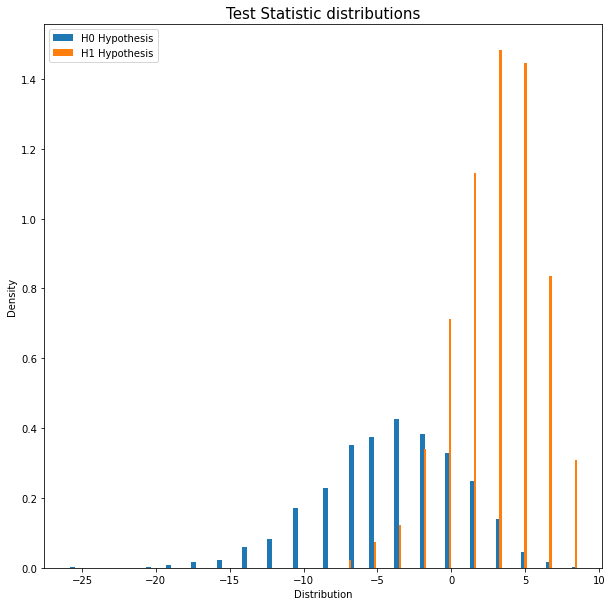

In [142]:
# Plot the histograms
plt.figure(figsize = (10,10))
plt.hist(t0list, bins = 100, label = "H0 Hypothesis", density = True)
plt.hist(t1list, bins = 100, label = "H1 Hypothesis", density = True)
plt.xlabel("Distribution", fontsize = 10)
plt.ylabel("Density", fontsize = 10)
plt.title("Test Statistic distributions", fontsize =15)
plt.legend(loc = "upper left")
plt.show()